In [1]:
# Importing necessary libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from __future__ import print_function

%matplotlib inline

## Загрузим данные

In [2]:
df_out = pd.read_csv('Data/LHCb_PID_obscured.csv')

In [3]:
# Let's look at our data set
vars_list = list(df_out.keys())
df_out.head()

,pid,S5aux0,S3aux0,S2aux0,S0aux0,S0aux1,S0aux2,S0aux3,S2aux1,S2aux2,...,S4x1,S4x2,S3x2,S4x3,S4x4,S5x1,S5x2,S5x3,S5x4,S4x5
0,a,1.0,1.0,1.0,12.470869,16.0,1.498864,4.0,0.0,0.0,...,43124.0,1.0,4497.850098,1696.200195,0.195356,1.046679,538.357971,35546.0,1.0,655.779785
1,f,1.0,-999.0,-999.0,2.611352,6.0,8.613868,9.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.942609,745.686462,35684.0,0.0,-999.000000
2,c,1.0,1.0,1.0,15.694536,17.0,5.911904,7.0,1.0,1.0,...,35553.0,1.0,566.271973,1401.664062,0.538877,0.841611,811.178467,35799.0,0.0,-2616.123047
3,d,-999.0,1.0,1.0,12.244493,14.0,2.455816,3.0,0.0,0.0,...,39028.0,1.0,4894.333984,85.869995,1.656766,-999.000000,-999.000000,-999.0,-999.0,230.555283
4,c,1.0,-999.0,-999.0,22.676029,19.0,4.777353,5.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.968089,1529.644287,34142.0,1.0,-999.000000


Replace -999 to None

In [4]:
for column_name in df_out.keys():
    mask = df_out[column_name] == -999
    df_out.loc[mask, column_name] = None

In [5]:
df_out.head()

,pid,S5aux0,S3aux0,S2aux0,S0aux0,S0aux1,S0aux2,S0aux3,S2aux1,S2aux2,...,S4x1,S4x2,S3x2,S4x3,S4x4,S5x1,S5x2,S5x3,S5x4,S4x5
0,a,1.0,1.0,1.0,12.470869,16.0,1.498864,4.0,0.0,0.0,...,43124.0,1.0,4497.850098,1696.200195,0.195356,1.046679,538.357971,35546.0,1.0,655.779785
1,f,1.0,NaN,NaN,2.611352,6.0,8.613868,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.942609,745.686462,35684.0,0.0,NaN
2,c,1.0,1.0,1.0,15.694536,17.0,5.911904,7.0,1.0,1.0,...,35553.0,1.0,566.271973,1401.664062,0.538877,0.841611,811.178467,35799.0,0.0,-2616.123047
3,d,NaN,1.0,1.0,12.244493,14.0,2.455816,3.0,0.0,0.0,...,39028.0,1.0,4894.333984,85.869995,1.656766,NaN,NaN,NaN,NaN,230.555283
4,c,1.0,NaN,NaN,22.676029,19.0,4.777353,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.968089,1529.644287,34142.0,1.0,NaN


In [6]:
df_out.shape

(3272304, 51)

In [7]:
df_out.dropna(subset=list(filter(lambda var: 'aux' not in var, vars_list))).shape

(263979, 51)

In [8]:
df_out.dropna().shape

(263979, 51)

## Изучим данные

In [9]:
# See how many examples of the different particles we have
# a is one type of particle like a muon, b is another
print(df_out['pid'].value_counts().sort_index())
print("\nTotal number of samples :\t", len(df_out))

a    545384
b    545384
c    545384
d    545384
e    545384
f    545384
Name: pid, dtype: int64

Total number of samples :	 3272304


Посмотрим на корреляцию признаков

In [10]:
sorted_keys = sorted(filter(lambda var: 'aux' not in var and 'pid' not in var, vars_list), 
                     key=lambda t: int(t[1]) * 100 + int(t[3:]) * 1)
sorted_keys.extend(sorted(filter(lambda var: 'aux' in var, vars_list), 
                          key=lambda t: int(t[1]) * 100 + int(t[5:]) * 1))

In [11]:
print(sorted_keys)

['S0x0', 'S0x1', 'S0x2', 'S0x3', 'S0x4', 'S0x5', 'S0x6', 'S0x7', 'S0x8', 'S0x9', 'S0x10', 'S1x0', 'S1x1', 'S1x2', 'S1x3', 'S1x4', 'S1x5', 'S2x0', 'S2x1', 'S2x2', 'S2x3', 'S3x0', 'S3x1', 'S3x2', 'S4x0', 'S4x1', 'S4x2', 'S4x3', 'S4x4', 'S4x5', 'S5x0', 'S5x1', 'S5x2', 'S5x3', 'S5x4', 'S0aux0', 'S0aux1', 'S0aux2', 'S0aux3', 'S0aux4', 'S0aux5', 'S0aux6', 'S0aux7', 'S0aux8', 'S2aux0', 'S2aux1', 'S2aux2', 'S2aux3', 'S3aux0', 'S5aux0']


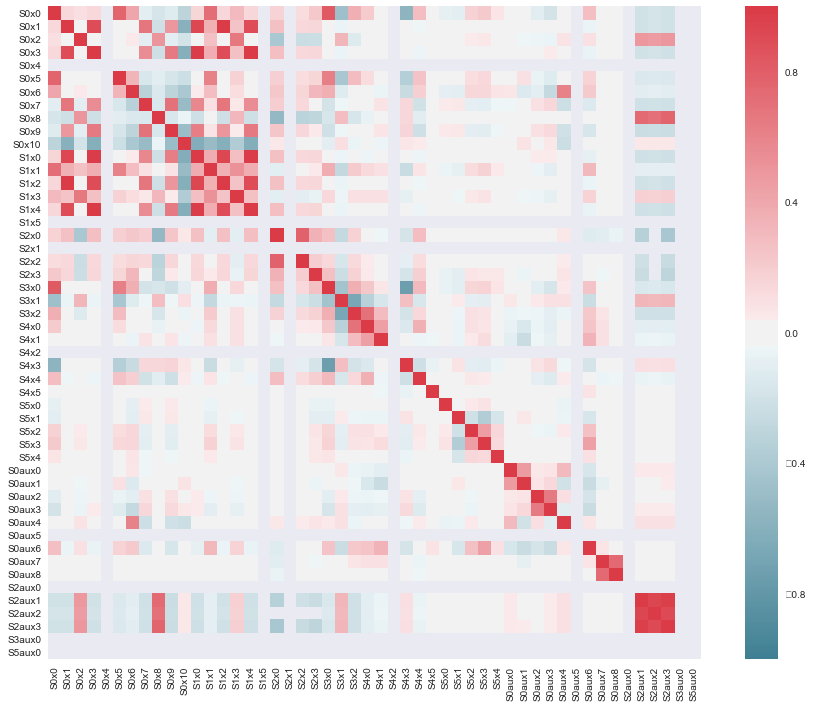

In [12]:
f, ax = plt.subplots(figsize=(16, 12))
corr = df_out.corr()
sns.heatmap(corr.loc[sorted_keys, sorted_keys], square=True, ax=ax, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

Добавим в матрицу корреляций метки частиц

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
tmp = pd.DataFrame(
    ohe.fit_transform(le.fit_transform(df_out.pid.values.reshape(-1, 1)).reshape(-1, 1)),
    columns=['pid=' + str(pid) for pid in le.classes_]
)

/home/mivakhnenko/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
tmp.head()

,pid=a,pid=b,pid=c,pid=d,pid=e,pid=f
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


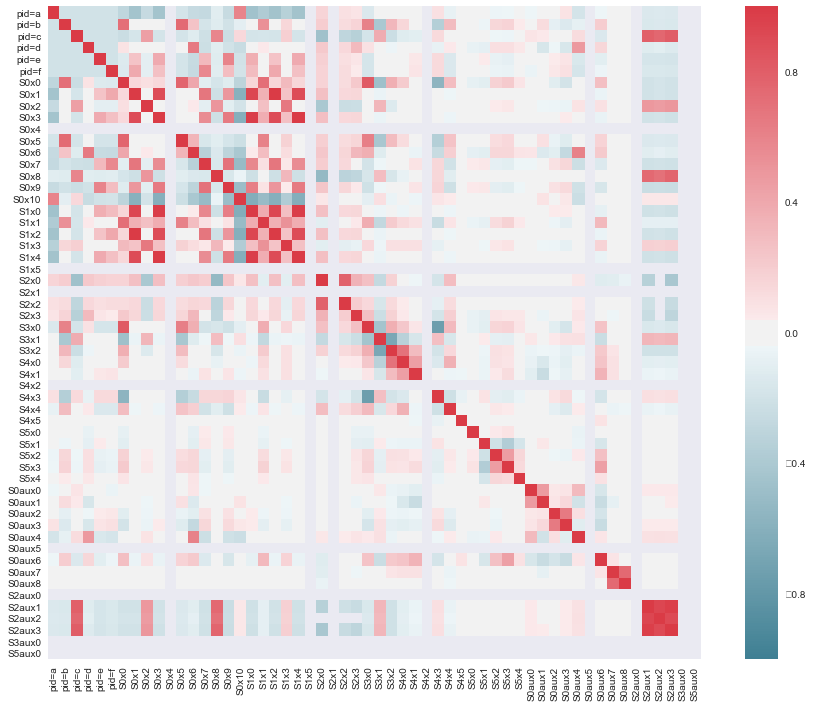

In [15]:
f, ax = plt.subplots(figsize=(16, 12))
corr = pd.concat([df_out, tmp], axis=1).corr()
sns.heatmap(corr.loc[list(tmp.keys()) + sorted_keys, list(tmp.keys()) + sorted_keys], square=True, ax=ax, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

Возьмем значения по модулю, чтобы не обращать внимание на обратную корреляцию

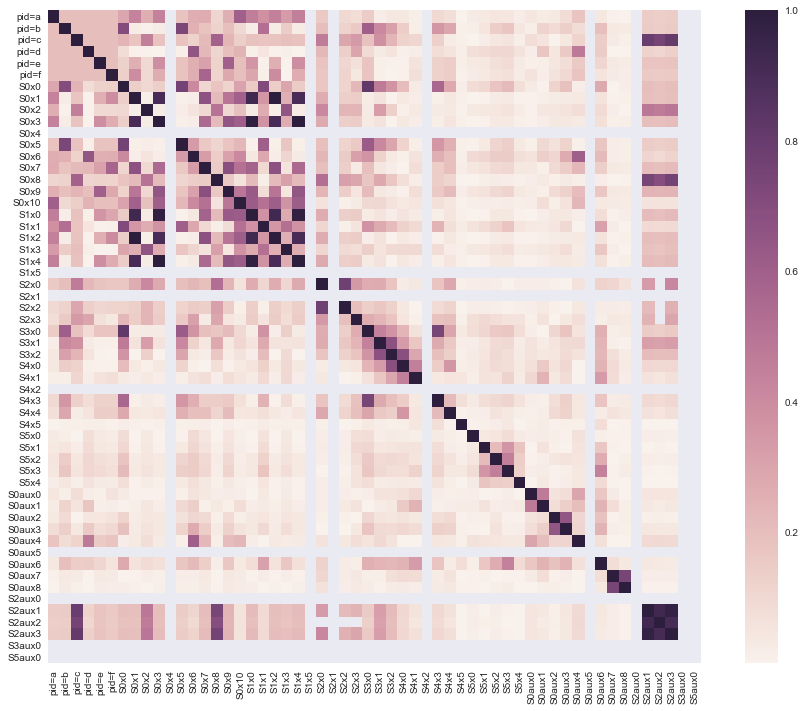

In [16]:
f, ax = plt.subplots(figsize=(16, 12))
corr = pd.concat([df_out, tmp], axis=1).corr()
sns.heatmap(corr.loc[list(tmp.keys()) + sorted_keys, list(tmp.keys()) + sorted_keys].abs(), square=True, ax=ax)

## Посмотрим на закономерности пропусков в данных

In [39]:
df_miss = df_out.loc[:, sorted_keys].copy()

In [40]:
df_miss.head()

,S0x0,S0x1,S0x2,S0x3,S0x4,S0x5,S0x6,S0x7,S0x8,S0x9,...,S0aux5,S0aux6,S0aux7,S0aux8,S2aux0,S2aux1,S2aux2,S2aux3,S3aux0,S5aux0
0,-8.843788,-44.103401,-3.486317,-40.958199,0.0,7.898278e-07,0.000830,0.000184,0.000000,0.000116,...,3.0,4.322297,16438.97,436.192492,1.0,0.0,0.0,0.0,1.0,1.0
1,0.209743,11.696800,0.656208,12.913000,0.0,3.596808e-03,0.001385,0.879603,0.000000,0.701120,...,3.0,3.854421,18439.95,780.981832,NaN,NaN,NaN,NaN,NaN,1.0
2,-12.142066,-25.278601,-2.814050,-25.278601,0.0,2.207075e-10,0.043909,0.000689,0.161219,0.000046,...,3.0,2.348994,5559.26,1051.845462,1.0,1.0,1.0,1.0,1.0,1.0
3,2.457668,0.000000,-5.520819,0.000000,0.0,9.774720e-02,0.448586,0.084286,0.000000,0.046907,...,3.0,4.697953,6634.23,120.917559,1.0,0.0,0.0,0.0,1.0,NaN
4,-5.907721,-0.982300,0.715552,-0.982300,0.0,2.079078e-04,0.511902,0.032972,0.000000,0.031375,...,3.0,3.262785,2880.11,220.187948,NaN,NaN,NaN,NaN,NaN,1.0


In [41]:
for column_name in df_miss.keys():
    mask = pd.isnull(df_miss[column_name])
    df_miss.loc[mask, column_name] = 0
    df_miss.loc[mask ^ True, column_name] = 1

In [42]:
df_miss.head()

,S0x0,S0x1,S0x2,S0x3,S0x4,S0x5,S0x6,S0x7,S0x8,S0x9,...,S0aux5,S0aux6,S0aux7,S0aux8,S2aux0,S2aux1,S2aux2,S2aux3,S3aux0,S5aux0
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
df_miss.drop_duplicates(inplace=True)

In [49]:
df_miss.shape

(44, 50)

In [52]:
compressed_vars = list(filter(lambda var: 'aux' not in var and 'pid' not in var, vars_list))

In [54]:
df_miss_unique = df_miss.drop_duplicates(subset=compressed_vars)

### Посмотрим данные с каких детекторов в каких комбинациях отстутсвуют

#### Сжимаемые фичи

S0x...

In [57]:
df_miss_unique[list(filter(lambda var: var[1] == '0', compressed_vars))]

,S0x0,S0x1,S0x2,S0x3,S0x4,S0x5,S0x6,S0x7,S0x8,S0x9,S0x10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
33,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
37,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
114,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Всегда присутствуют

S1x...

In [58]:
df_miss_unique[list(filter(lambda var: var[1] == '1', compressed_vars))]

,S1x0,S1x1,S1x2,S1x3,S1x4,S1x5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0
15,1.0,1.0,1.0,1.0,1.0,1.0
33,1.0,1.0,1.0,1.0,1.0,1.0
37,0.0,0.0,0.0,0.0,0.0,0.0
114,1.0,1.0,1.0,1.0,1.0,1.0


S2x...

In [59]:
df_miss_unique[list(filter(lambda var: var[1] == '2', compressed_vars))]

,S2x0,S2x1,S2x2,S2x3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0
33,1.0,1.0,1.0,1.0
37,1.0,1.0,1.0,1.0
114,1.0,1.0,1.0,1.0


S3x...

In [60]:
df_miss_unique[list(filter(lambda var: var[1] == '3', compressed_vars))]

,S3x0,S3x1,S3x2
0,1.0,1.0,1.0
1,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
6,1.0,1.0,1.0
10,1.0,1.0,1.0
15,0.0,0.0,0.0
33,1.0,1.0,1.0
37,1.0,1.0,1.0
114,1.0,1.0,1.0


S4x...

In [61]:
df_miss_unique[list(filter(lambda var: var[1] == '4', compressed_vars))]

,S4x0,S4x1,S4x2,S4x3,S4x4,S4x5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,1.0,1.0,1.0,1.0,1.0
15,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0
37,1.0,1.0,1.0,1.0,1.0,1.0
114,1.0,1.0,1.0,1.0,1.0,1.0


S5x...

In [62]:
df_miss_unique[list(filter(lambda var: var[1] == '5', compressed_vars))]

,S5x0,S5x1,S5x2,S5x3,S5x4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,1.0
10,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0
33,1.0,1.0,1.0,1.0,1.0
37,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0


#### Вспомогательные фичи

In [63]:
aux_vars = list(filter(lambda var: 'aux' in var and 'pid' not in var, vars_list))

In [64]:
aux_vars

['S5aux0',
 'S3aux0',
 'S2aux0',
 'S0aux0',
 'S0aux1',
 'S0aux2',
 'S0aux3',
 'S2aux1',
 'S2aux2',
 'S2aux3',
 'S0aux4',
 'S0aux5',
 'S0aux6',
 'S0aux7',
 'S0aux8']

S0aux...

In [65]:
df_miss_unique[list(filter(lambda var: var[1] == '0', aux_vars))]

,S0aux0,S0aux1,S0aux2,S0aux3,S0aux4,S0aux5,S0aux6,S0aux7,S0aux8
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
33,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
37,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
114,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


S2aux...

In [66]:
df_miss_unique[list(filter(lambda var: var[1] == '2', aux_vars))]

,S2aux0,S2aux1,S2aux2,S2aux3
0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0
15,1.0,1.0,1.0,1.0
33,1.0,1.0,1.0,1.0
37,1.0,1.0,1.0,1.0
114,1.0,1.0,1.0,1.0


S3aux...

In [67]:
df_miss_unique[list(filter(lambda var: var[1] == '3', aux_vars))]

,S3aux0
0,1.0
1,0.0
2,1.0
3,1.0
6,1.0
10,1.0
15,0.0
33,1.0
37,1.0
114,1.0


S5aux...

In [68]:
df_miss_unique[list(filter(lambda var: var[1] == '5', aux_vars))]

,S5aux0
0,1.0
1,1.0
2,1.0
3,0.0
6,1.0
10,0.0
15,0.0
33,1.0
37,0.0
114,0.0


#### Выводы по пропускам

Радует, что данные разделены по группам детекторов(либо все есть из определенной группы, либо всех нет). Сжимаемые и вспомогательные данные из "0" группы есть всегда.

## Проверим совместимость групп детекторов

In [72]:
df_miss_unique[['S0x0', 'S1x0', 'S2x0', 'S3x0', 'S4x0', 'S5x0', 'S0aux0', 'S2aux0', 'S3aux0', 'S5aux0']].drop_duplicates().shape

(20, 10)

In [73]:
df_miss_unique[['S0x0', 'S1x0', 'S2x0', 'S3x0', 'S4x0', 'S5x0']].drop_duplicates().shape

(20, 6)

In [74]:
df_miss_unique[['S0aux0', 'S2aux0', 'S3aux0', 'S5aux0']].drop_duplicates().shape

(6, 4)

Т.е. всего 20 возможных взаимных конфигураций групп детекторов и 6 комбинаций вспомогательных

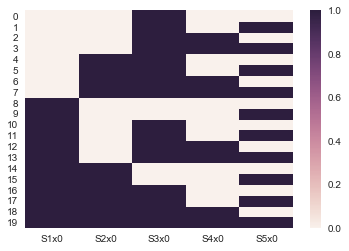

In [82]:
cur_vars = ['S1x0', 'S2x0', 'S3x0', 'S4x0', 'S5x0']
sns.heatmap(df_miss_unique[cur_vars].drop_duplicates().sort_values(cur_vars, axis=0).reset_index(drop=True))

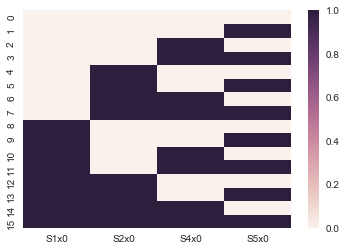

In [84]:
cur_vars = ['S1x0', 'S2x0', 'S4x0', 'S5x0']
sns.heatmap(df_miss_unique[cur_vars].drop_duplicates().sort_values(cur_vars, axis=0).reset_index(drop=True))

Видно, что взаимное присутствие данных с детекторов всех групп, кроме "3", независимо(если есть данные с одной группы детекторов, то нельзя гарантировать, что данные с других групп присутствуют/отсутствуют). Зато если нет данных с "1" группы, то с "3" они обязательно есть.

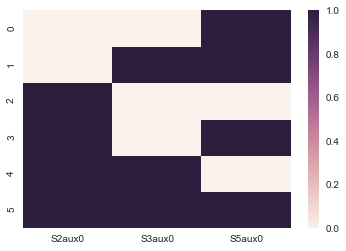

In [81]:
cur_vars = ['S2aux0', 'S3aux0', 'S5aux0']
sns.heatmap(df_miss_unique[cur_vars].drop_duplicates().sort_values(cur_vars, axis=0).reset_index(drop=True))

Если нет данных со "2aux", то есть с "5aux"

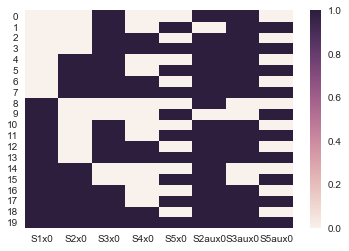

In [85]:
cur_vars = ['S1x0', 'S2x0', 'S3x0', 'S4x0', 'S5x0', 'S2aux0', 'S3aux0', 'S5aux0']
sns.heatmap(df_miss_unique[cur_vars].drop_duplicates().sort_values(cur_vars, axis=0).reset_index(drop=True))

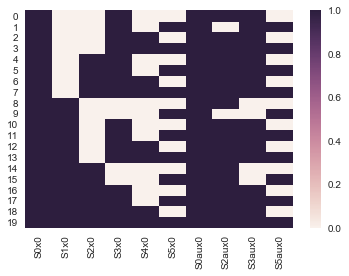

In [83]:
cur_vars = ['S0x0', 'S1x0', 'S2x0', 'S3x0', 'S4x0', 'S5x0', 'S0aux0', 'S2aux0', 'S3aux0', 'S5aux0']
sns.heatmap(df_miss_unique[cur_vars].drop_duplicates().sort_values(cur_vars, axis=0).reset_index(drop=True))

Данные с "3" + "3aux" и "5" + "5aux" идут в паре (есть одна группа <=> есть и вторая)

## Подготовка данных для обучения автоэнкодеров

In [87]:
df_out.replace(np.nan, -999, inplace=True)

In [88]:
print(vars_list)

['pid', 'S5aux0', 'S3aux0', 'S2aux0', 'S0aux0', 'S0aux1', 'S0aux2', 'S0aux3', 'S2aux1', 'S2aux2', 'S2aux3', 'S0aux4', 'S0aux5', 'S0aux6', 'S0aux7', 'S0aux8', 'S0x0', 'S0x1', 'S0x2', 'S0x3', 'S0x4', 'S3x0', 'S3x1', 'S2x0', 'S2x1', 'S2x2', 'S2x3', 'S0x5', 'S0x6', 'S0x7', 'S0x8', 'S0x9', 'S0x10', 'S1x0', 'S1x1', 'S1x2', 'S1x3', 'S1x4', 'S1x5', 'S5x0', 'S4x0', 'S4x1', 'S4x2', 'S3x2', 'S4x3', 'S4x4', 'S5x1', 'S5x2', 'S5x3', 'S5x4', 'S4x5']


In [89]:
# There is missing data, which is denoted by a value of -999
# Lets check out the structure of the data
# There are several groups of data that are either missing or not denoted S1, S2, ... 
# Features with the prefex S0 are always present
# Features with aux in the name are auxiliary features and do not need to be compressed.

df_out_with = collections.OrderedDict()

#df_out_with['all'] = df_out
df_out_with['any'] = df_out.loc[
    (df_out['S1x1']!=-999) | (df_out['S2x2']!=-999) | (df_out['S3x0']!=-999)  
    | (df_out['S4x1']!=-999) | (df_out['S5x3']!=-999)
]


df_out_with['S1'] = df_out.loc[df_out['S1x1']!=-999]
df_out_with['S2'] = df_out.loc[df_out['S2x2']!=-999]
df_out_with['S3'] = df_out.loc[df_out['S3x0']!=-999]
df_out_with['S4'] = df_out.loc[df_out['S4x1']!=-999]
df_out_with['S5'] = df_out.loc[df_out['S5x3']!=-999]
df_out_with['all_systems'] = df_out.loc[
    (df_out['S1x1']!=-999) & (df_out['S2x2']!=-999) & (df_out['S3x0']!=-999) 
    & (df_out['S4x1']!=-999) & (df_out['S5x3']!=-999)
]


d_n_examples = collections.OrderedDict()
for key in df_out_with:
    d_n_examples[key] = 1.*len(df_out_with[key])
    
group_members = collections.OrderedDict()
for key in df_out_with:
    group_members[key] = []

for v in vars_list:
#     print len(df_out[v]==-999), l_df_out
    ASSOCIATED = False
    for key in df_out_with:
        if not ASSOCIATED and len(df_out_with[key].loc[df_out_with[key][v]==-999])/d_n_examples[key] == 0: 
            group_members[key].append(v)
            ASSOCIATED = True

    if not ASSOCIATED:
        s = "{0:30} \t".format(v)
        for key in df_out_with:
             s += "{0:.2f}\t".format(len(df_out_with[key].loc[df_out_with[key][v]==-999])/d_n_examples[key])
        print (s)
#'''

#print  (len(df_out_withecal.loc[df_out_withecal["trks_S_CaloPrsE"]==-999]) )
print("\n\n")
print("Groups : ")
for key in group_members:
    print(key, group_members[key])
    
print("\n\nNumber of examples in each group: ", d_n_examples)




Groups : 
any ['pid', 'S0aux0', 'S0aux1', 'S0aux2', 'S0aux3', 'S0aux4', 'S0aux5', 'S0aux6', 'S0aux7', 'S0aux8', 'S0x0', 'S0x1', 'S0x2', 'S0x3', 'S0x4', 'S0x5', 'S0x6', 'S0x7', 'S0x8', 'S0x9', 'S0x10']
S1 ['S1x0', 'S1x1', 'S1x2', 'S1x3', 'S1x4', 'S1x5']
S2 ['S2aux0', 'S2aux1', 'S2aux2', 'S2aux3', 'S2x0', 'S2x1', 'S2x2', 'S2x3']
S3 ['S3aux0', 'S3x0', 'S3x1', 'S3x2']
S4 ['S4x0', 'S4x1', 'S4x2', 'S4x3', 'S4x4', 'S4x5']
S5 ['S5aux0', 'S5x0', 'S5x1', 'S5x2', 'S5x3', 'S5x4']
all_systems []


Number of examples in each group:  OrderedDict([('any', 3272304.0), ('S1', 3082975.0), ('S2', 435455.0), ('S3', 2676986.0), ('S4', 2154418.0), ('S5', 2532945.0), ('all_systems', 263979.0)])


In [90]:
# Choose some subset of the data to compress as an example. For the normal use case we want to compress them all. 
df_out_example = df_out[
    ['pid'] + list(
        set(group_members['any'] + group_members['S1'] + group_members['S3'])
        - set(["S0aux5", "pid", "S0x4", "S3aux0", "S1x5"])
    )][(df_out['S1x1'] != -999) & (df_out['S3x0'] != -999) ]
# print (df_out_ecal_rich.head())
print ("SHAPE : ", df_out_example.shape)
print (df_out_example['pid'].value_counts().sort_index())

SHAPE :  (2487657, 27)
a    438012
b    358002
c    408195
d    377725
e    450775
f    454948
Name: pid, dtype: int64


In [91]:
df_out_example.keys()

Index(['pid', 'S1x4', 'S1x0', 'S1x3', 'S0x9', 'S0aux1', 'S0aux2', 'S0x7',
       'S3x2', 'S0x6', 'S0x1', 'S0x2', 'S3x1', 'S0x3', 'S0aux4', 'S0x10',
       'S0x8', 'S1x2', 'S0x5', 'S1x1', 'S0aux8', 'S3x0', 'S0aux3', 'S0aux6',
       'S0aux0', 'S0x0', 'S0aux7'],
      dtype='object')

In [92]:
df_out_example.to_csv("Data/Df_example.csv", index=False)     

df_out_example_10perc = df_out_example.sample(frac=0.1, replace=False)
df_out_example_10perc.to_csv("Data/Df_example_10perc.csv", index=False)

df_out_example_1perc = df_out_example.sample(frac=0.01, replace=False)
df_out_example_1perc.to_csv("Data/Df_example_1perc.csv", index=False)

df_out_example_100 = df_out_example.sample(frac=100./df_out_example.shape[0], replace=False)
df_out_example_100.to_csv("Data/Df_example_100.csv", index=False)